This notebook consists of initial analysis on calculating and visualising the difference between S1 and S3 TRENDY fluxes.

S0 = control. CO2, climate and land use off. Climate fixed at pre-industrial and land use mask.<br/>
S1 = CO2 on, climate off (fixed at pre-industrial). Land use off (mask)<br/>
S2 = CO2 and climate on. Land use off (mask)<br/>
S3 = CO2 and climate on. Land use on.

*<b>Off</b> = fixed, no time-variant forcing (time-invariant).
<b>On</b> = time-variant forcing.

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

In [30]:
model = 'LPJ-GUESS'

fS0 = f'./../../data/TRENDY/models/{model}/S0/{model}_S0_cVeg.nc'
fS1 = f'./../../data/TRENDY/models/{model}/S1/{model}_S1_cVeg.nc'
fS2 = f'./../../data/TRENDY/models/{model}/S2/{model}_S2_cVeg.nc'
fS3 = f'./../../data/TRENDY/models/{model}/S3/{model}_S3_cVeg.nc'

S0 = xr.open_dataset(fS0)
S1 = xr.open_dataset(fS1)
S2 = xr.open_dataset(fS2)
S3 = xr.open_dataset(fS3)

In [31]:
S0

<xarray.Dataset>
Dimensions:    (latitude: 360, longitude: 720, time: 319)
Coordinates:
  * longitude  (longitude) float64 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
  * latitude   (latitude) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * time       (time) object 1700-07-01 00:00:00 ... 2018-07-01 00:00:00
Data variables:
    cVeg       (time, latitude, longitude) float32 ...
Attributes:
    title:        LPJ-GUESS output: S0 scenario
    institution:  IMK-IFU, Karlsruhe Institute of Technology, Garmisch-Parten...
    contact:      Peter Anthoni, peter.anthoni@kit.edu
    version:      v1

FUNCTIONS

In [32]:
def single_time_plot(model, time):
    Veg = model.cVeg.sel(time=time).values[0]
    
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.contourf(model.longitude, model.latitude, Veg)


In [33]:
def single_point_timeseries(model, lat, lon, subplot=None):
    Veg = model.cVeg.sel(latitude=lat, longitude=lon)
    
    if subplot:
        plt.subplot(subplot)
        
    plt.plot(np.arange(1700, 2019), Veg.values)


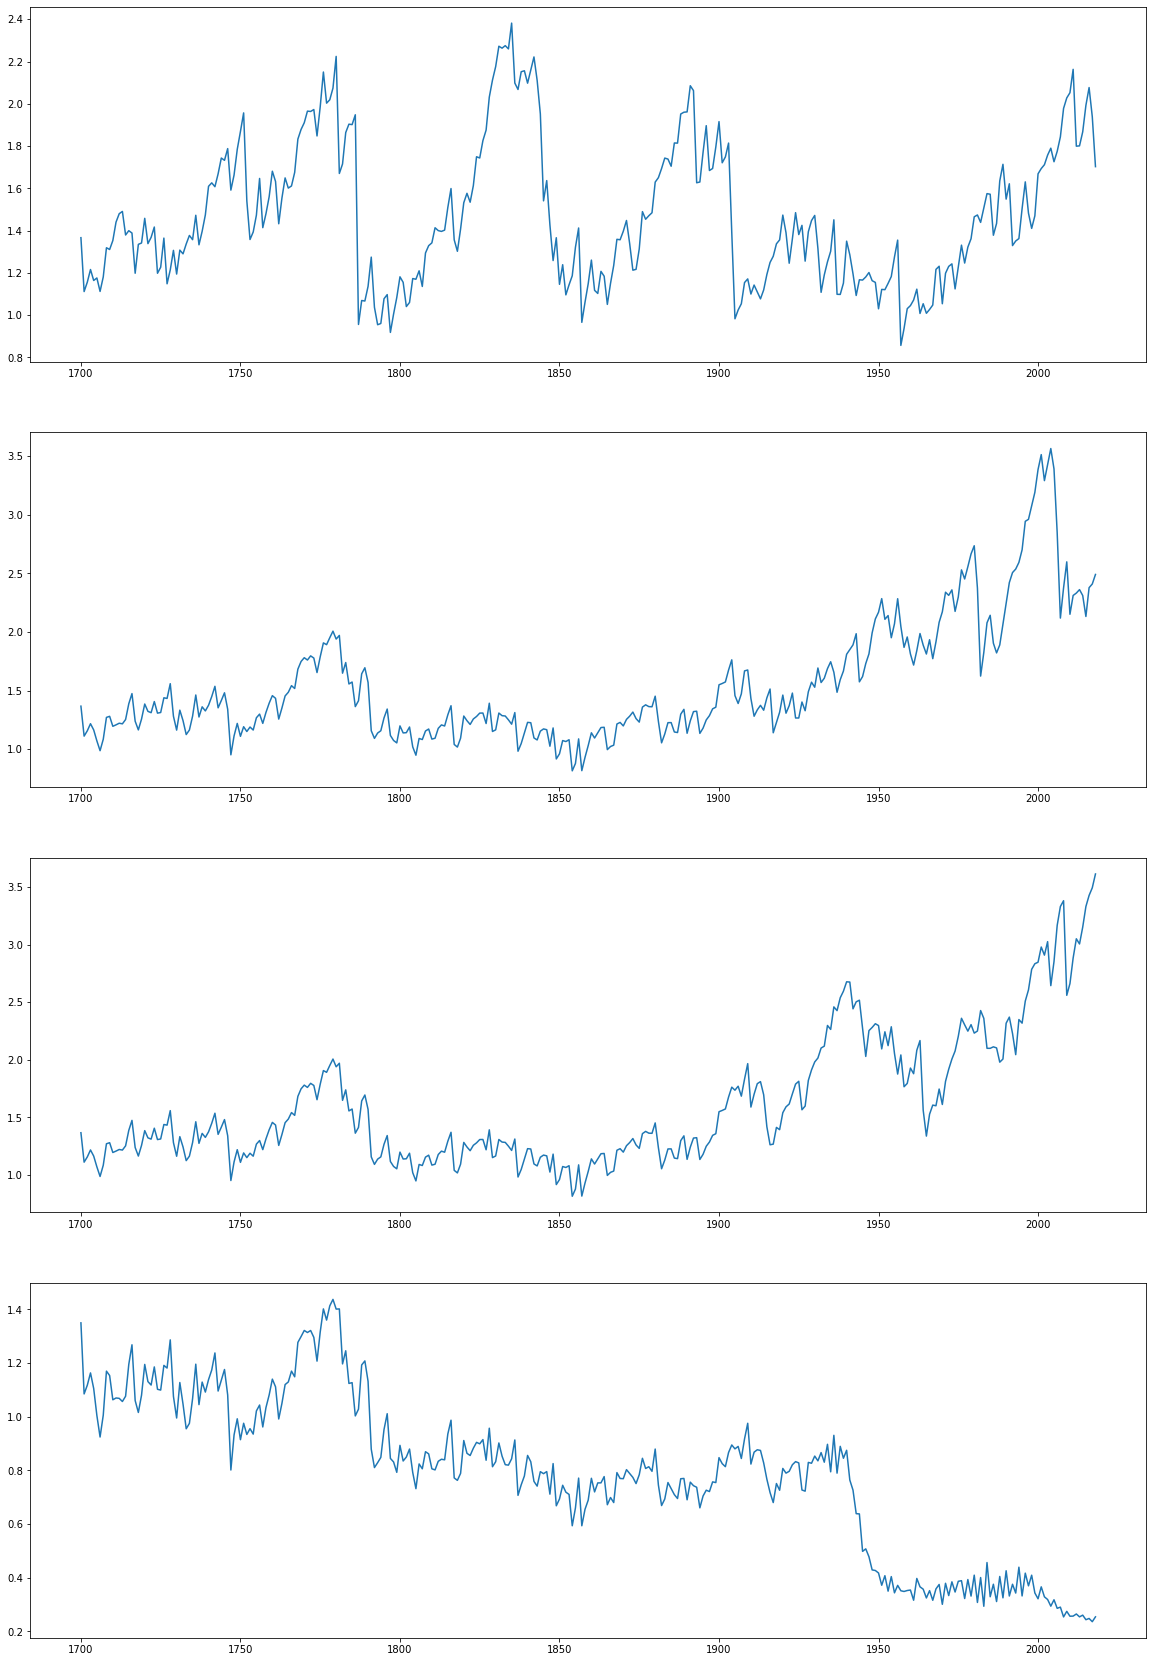

In [34]:
plt.figure(figsize=(20,30))
single_point_timeseries(S0, 9.25, 9.25, "411")
single_point_timeseries(S1, 9.25, 9.25, "412")
single_point_timeseries(S2, 9.25, 9.25, "413")
single_point_timeseries(S3, 9.25, 9.25, "414")

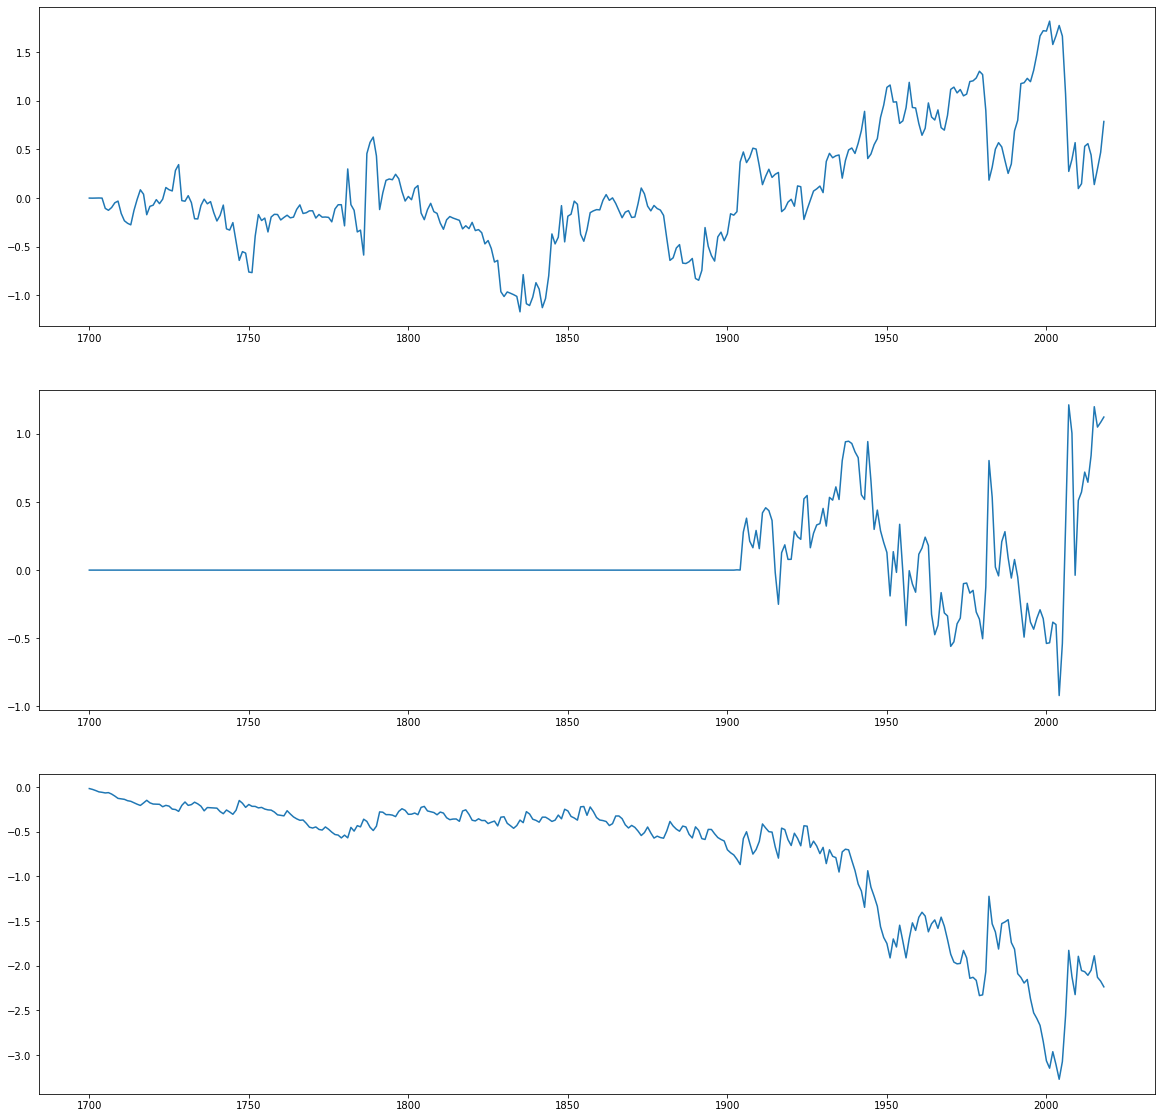

In [35]:
plt.figure(figsize=(20,20))
single_point_timeseries(S1-S0, 9.25, 9.25, "311") # Effect of CO2 (without climate and land use).
single_point_timeseries(S2-S1, 9.25, 9.25, "312") # Effect of climate without land use.
single_point_timeseries(S3-S1, 9.25, 9.25, "313") # Effect of climate with land use.

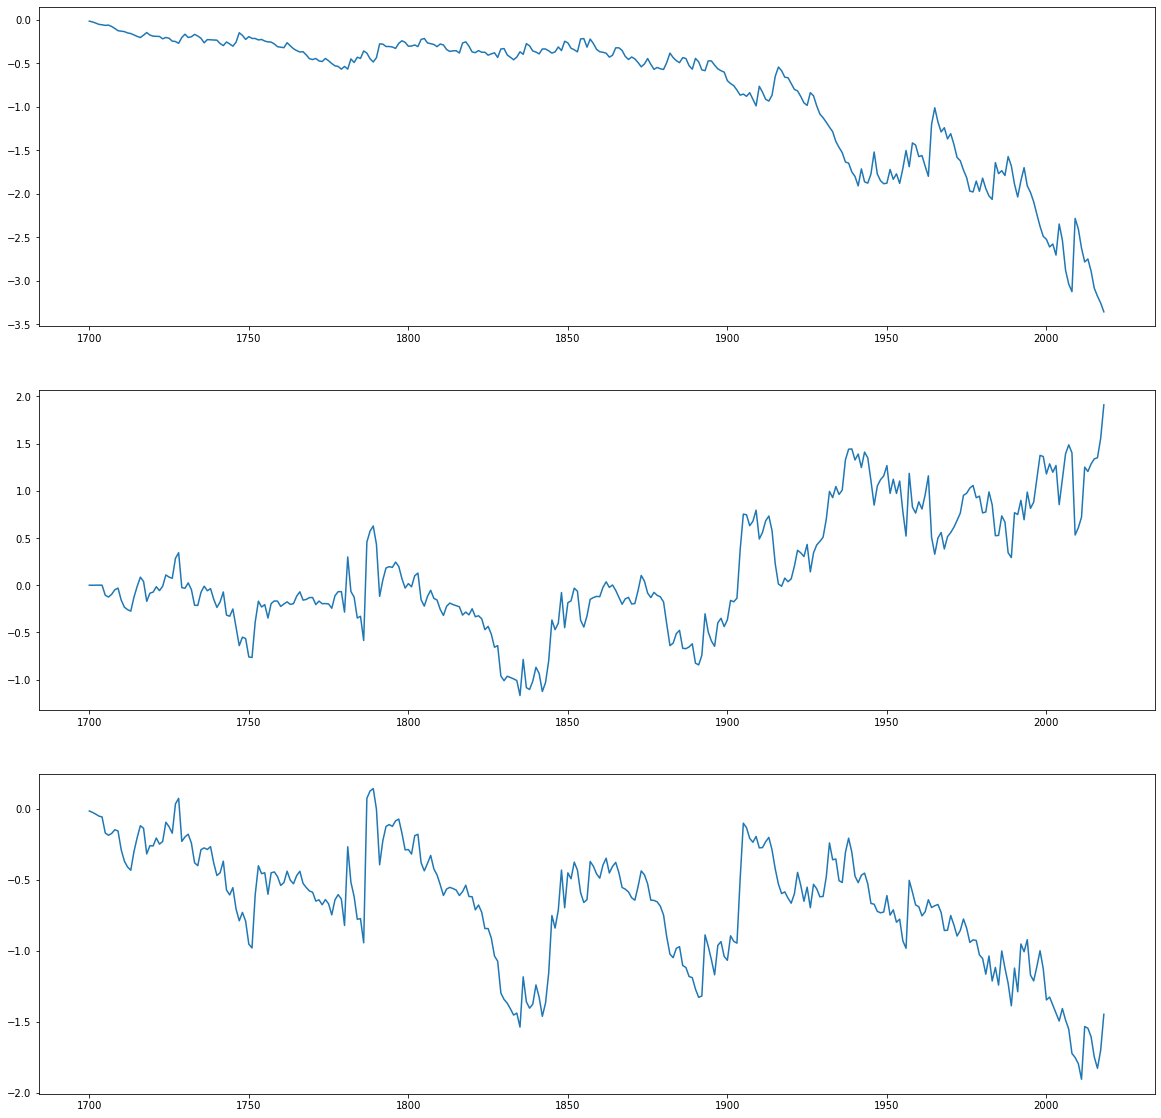

In [36]:
plt.figure(figsize=(20,20))
single_point_timeseries(S3-S2, 9.25, 9.25, "311") # Effect of land use.
single_point_timeseries(S2-S0, 9.25, 9.25, "312") # Effect of CO2 and climate without land use.
single_point_timeseries(S3-S0, 9.25, 9.25, "313") # Effect of CO2 and climate with land use.